# _Principal Component Analysis_ (PCA) para el análisis de datos

## 1. Importar Datos
El archivo de entrada debe ser un archivo de texto plano con el formato siguiente:
```
No. Elementos
No. Atributos
No. Clases
atrib_0, atrib_1, ..., atrib_n, clase
atrib_0, atrib_1, ..., atrib_n, clase
... ... ...
atrib_0, atrib_1, ..., atrib_n, clase
```

### 1.1 Preprocesar archivo

In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

nombre_archivo = "data"

In [321]:
try:
    with open( nombre_archivo + ".txt", "r") as archivo:
        nElem = int(archivo.readline())
        nAtrib = int(archivo.readline())
        nClases = int(archivo.readline())
        
        nombres_atributos = []
        for i in range(0, nAtrib):
            nombres_atributos.append("atrib_" + str(i))
        
        nombres_atributos.append("clase")
        data = pd.read_csv(archivo, delimiter=',', header=None)
        data.columns = nombres_atributos
    
except FileNotFoundError:
    print( "ERROR: El archivo " + nombre_archivo + " no fue encontrado");
finally:
    archivo.close();


### Descripción del dataset

In [322]:
data.head()

,atrib_0,atrib_1,atrib_2,atrib_3,atrib_4,atrib_5,atrib_6,atrib_7,atrib_8,atrib_9,atrib_10,atrib_11,atrib_12,atrib_13,atrib_14,atrib_15,atrib_16,atrib_17,atrib_18,clase
0,140,125,0,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818,0
1,188,133,0,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817,0
2,105,139,0,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946,0
3,34,137,0,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272,0
4,39,111,0,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773,0


## 2. Preprocesamiento

In [323]:
dataset = data.drop('clase', 1)
dataset_clase = data['clase']

dataset_estandarizada = StandardScaler().fit_transform(dataset)

try:
    nombres_atributos.remove('clase')
except:
    print('')
    
pd.DataFrame(data = dataset_estandarizada, columns = nombres_atributos).head()

,atrib_0,atrib_1,atrib_2,atrib_3,atrib_4,atrib_5,atrib_6,atrib_7,atrib_8,atrib_9,atrib_10,atrib_11,atrib_12,atrib_13,atrib_14,atrib_15,atrib_16,atrib_17,atrib_18
0,-0.058049,-0.285629,0.0,-0.338097,-0.199868,-0.621918,-0.110554,-0.463761,-0.090389,-0.784836,-0.693751,-0.796105,-0.848481,1.511535,-0.712136,-0.070207,-0.849913,0.757935,-0.001032
1,0.598297,-0.153891,0.0,-0.338097,-0.199868,-0.598559,-0.103935,-0.509463,-0.093776,-0.769504,-0.659068,-0.793056,-0.837138,1.680258,-0.772656,-0.106443,-0.831181,0.724362,0.119387
2,-0.536634,-0.055087,0.0,-0.338097,-0.199868,-0.621918,-0.109110,-0.418060,-0.087325,-0.787194,-0.686044,-0.808304,-0.848481,1.607948,-0.772656,-0.052089,-0.856157,0.696035,0.094247
3,-1.507478,-0.088021,0.0,-0.338097,-0.199868,-0.528480,-0.107184,-0.341891,-0.088024,-0.795450,-0.678336,-0.829651,-0.856043,1.764620,-0.857382,-0.043030,-0.849913,0.891177,0.229748
4,-1.439109,-0.516170,0.0,-0.338097,-0.199868,-0.435042,-0.100444,-0.402826,-0.088669,-0.789553,-0.705312,-0.796105,-0.852262,1.451277,-0.687929,-0.061148,-0.846791,0.840188,-0.034012


## 3. Aplicar PCA

In [324]:
nComponentes = int(input())
pca = PCA(n_components=nComponentes)

2


In [327]:
data_pca = pca.fit_transform(data_estandarizada)
dataframe_pca = pd.DataFrame(data = data_pca, columns=['PC1', 'PC2'])
dataframe_pca.head()

,PC1,PC2
0,-2.299677,-0.343837
1,-2.371925,-0.403867
2,-2.389590,-0.266572
3,-2.514506,-0.096834
4,-2.236746,-0.124341


## 4. Visualizar resultados

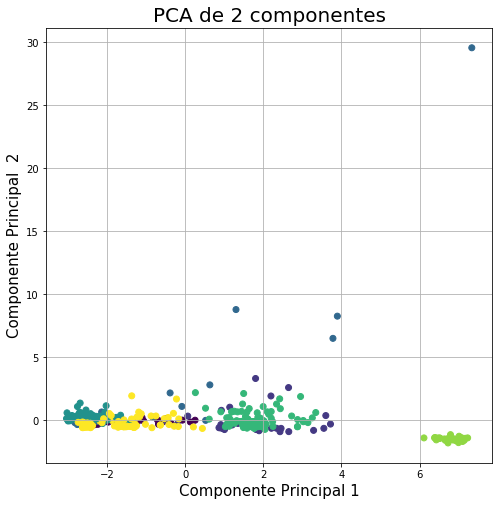

In [304]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente Principal 1', fontsize = 15)
ax.set_ylabel('Componente Principal  2', fontsize = 15)
ax.set_title('PCA de 2 componentes', fontsize = 20)


plt.scatter(data_pca[:,0],data_pca[:,1], c=data['clase'])

# ax.legend(targets)
ax.grid()

## 5. Análisis